Zbiór danych:
Zawiera informacje dotyczące wniosków o kredyt hipoteczny w banku. Poszczególne kolumny reprezentują cechy związane z każdym wnioskiem.
- Loan_ID: Unikalny identyfikator każdego wniosku o kredyt.
- Gender: Płeć osoby składającej wniosek (mężczyzna/kobieta).
- Married: Status małżeński (żonaty/nie).
- Dependents: Liczba osób na utrzymaniu osoby składającej wniosek.
- Education: Poziom edukacji osoby składającej wniosek.
- Self_Employed: Czy osoba składająca wniosek jest samozatrudniona (tak/nie).
- ApplicantIncome: Dochód osoby składającej wniosek.
- CoapplicantIncome: Dochód współmałżonka lub współmałżonki osoby składającej wniosek.
- LoanAmount: Kwota kredytu hipotecznego wnioskowana przez osobę składającą wniosek.
- Loan_Amount_Term: Okres kredytowania (w miesiącach).
- Credit_History: Historia kredytowa (czy osoba składająca wniosek miała wcześniej kredyt hipoteczny, 1 - tak, 0 - nie).
- Property_Area: Lokalizacja nieruchomości (miejska/półmiejska/wiejska).
- Loan_Status: Status kredytu (zatwierdzony/niezatwierdzony).


Eksploracyjna analiza danych zbioru kredyt.csv

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Wczytanie pliku
df=pd.read_csv('kredyt.csv')
print(df.head(5))


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

Charakteryzacja zbioru (kształt, rodzaj zmiennych, statystyki opisowe)

In [8]:
df.shape

(614, 13)

In [9]:
df.info() #informacje o zmiennych


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:

df.describe() #statystyki opisowe

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Sprawdzenie czy w zbiorze są braki

In [11]:
print("Liczba braków przed usunięciem: ")
print(df.isnull().sum())

#Usunięcie wierszy zawierających braki
df_cleaned=df.dropna()

#Sprawdzenie liczby braków po usunięciu
print("\n Bez braków")
print(df_cleaned.isnull().sum())

Liczba braków przed usunięciem: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 Bez braków
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


#1 Hipoteza

Czy historia kredytowa i dochód wpływają na szansę uzyskania kredytu hipotecznego, biorąc pod uwagę status małżeński i edukację wnioskodawcy?

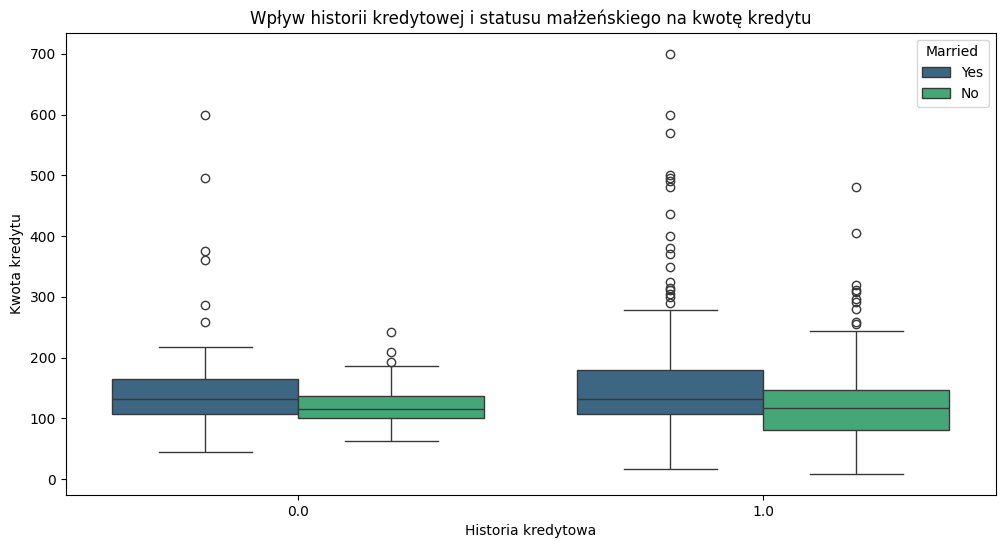

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Credit_History', y='LoanAmount', hue='Married', data=df, palette="viridis")
plt.title('Wpływ historii kredytowej i statusu małżeńskiego na kwotę kredytu')
plt.xlabel('Historia kredytowa')
plt.ylabel('Kwota kredytu')
plt.show()


Historia kredytowa i status małżeński: Osoby z pozytywną historią kredytową są bardziej skłonne ubiegać się o większe kwoty kredytów hipotecznych, zwłaszcza gdy są w związku małżeńskim. Wnioskodawcy z negatywną historią kredytową napotykają trudności w uzyskaniu większych kredytów, niezależnie od statusu małżeńskiego.

#Hipoteza 2
Czy lokalizacja nieruchomości ma wpływ na samozatrudnienie wnioskodawcy?

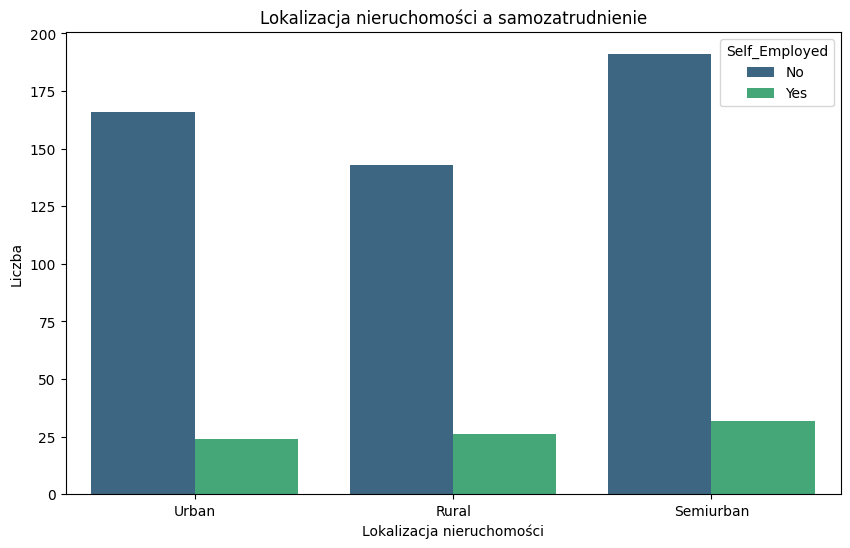

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Property_Area', hue='Self_Employed', data=df, palette='viridis')
plt.title('Lokalizacja nieruchomości a samozatrudnienie')
plt.xlabel('Lokalizacja nieruchomości')
plt.ylabel('Liczba')
plt.show()



 Nie ma wyraźnej różnicy w poziomie samozatrudnienia między osobami mieszkającymi w różnych obszarach (miejskim, półmiejskim, wiejskim). Istnieje tendencja do większej liczby samozatrudnionych wśród mieszkańców obszarów wiejskich, ta różnica nie ma istotnego wpływu na kredyt.